# Color Threshold, Green Screen

### Import resources

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [112]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


[ 41 253  47]


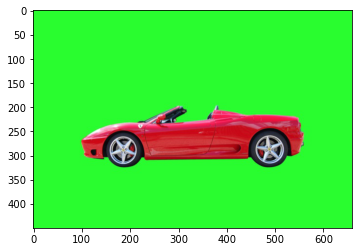

In [113]:
# Display the image
plt.imshow(image)
print(image[10][10])

### Define the color threshold

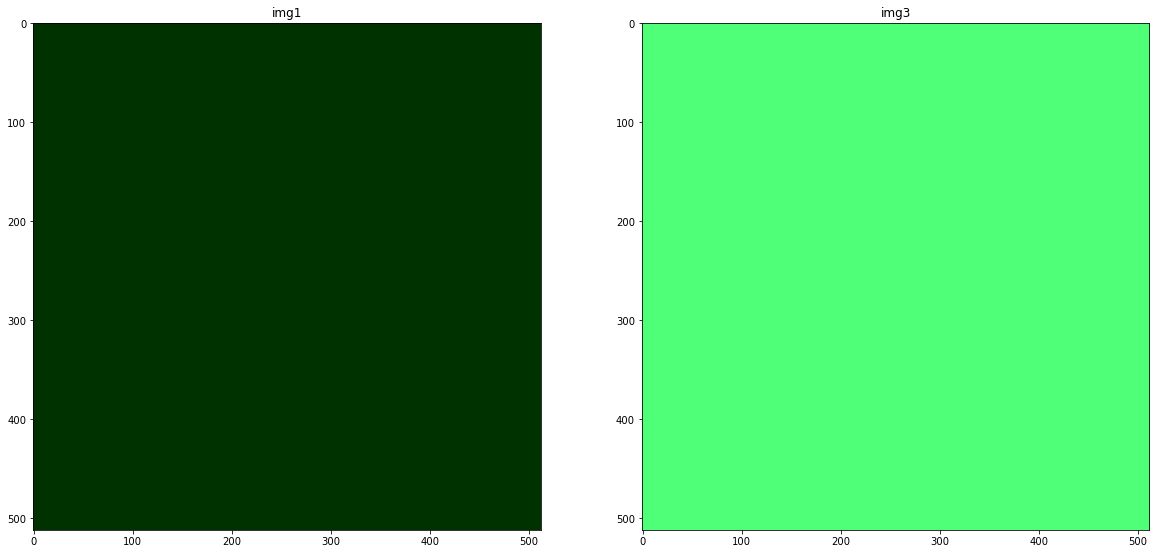

In [114]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,90,0]) 
upper_green = np.array([150,255,150])

img=np.full((512,512,3),(0,50,0),dtype=np.uint8)
img3=np.full((512,512,3),(80,255,120),dtype=np.uint8)

f1,(img1,img2)=plt.subplots(1,2,figsize=(20,30))
img1.set_title("img1")
img1.imshow(img)

img2.set_title("img3")
img2.imshow(img3)

### Create a mask

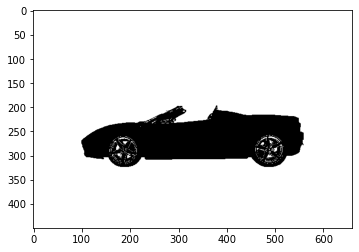

In [115]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

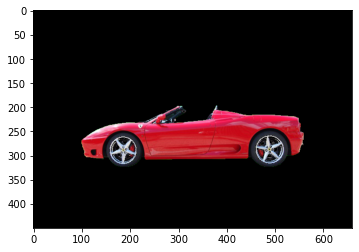

In [116]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

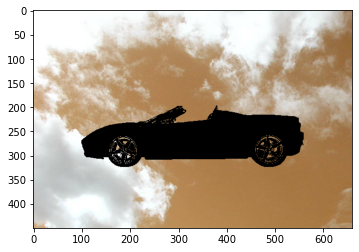

In [119]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

## TODO: Crop it or resize the background to be the right size (450x660)
crop_background=background_image[0:450,0:660]

## TODO: Mask the cropped background so that the car area is blocked
crop_background[mask == 0] = [0,0,0]

# Hint mask the opposite area of the previous image

## TODO: Display the background and make sure 
plt.imshow(crop_background)

### Create a complete image

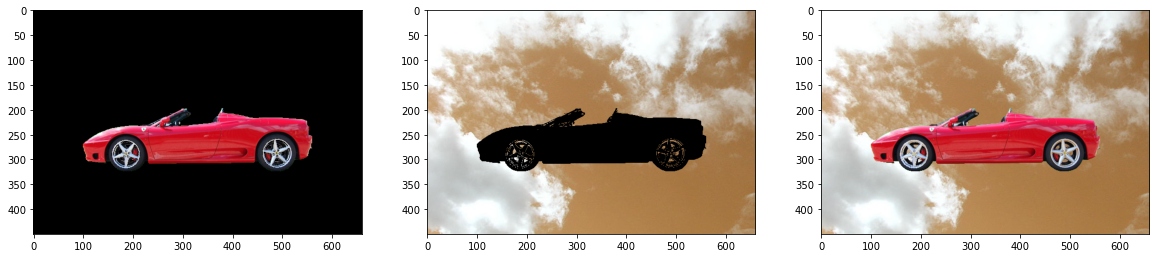

In [123]:
## TODO: Add the two images together to create a complete image!
complet_image=masked_image +crop_background
# complete_image = masked_image + crop_background
f1,(a,b,c)=plt.subplots(1,3,figsize=(20,30))
a.imshow(masked_image)
b.imshow(crop_background)

c.imshow(complet_image)